WORKING on IMDB Dataset, Creating a Network

In [47]:
from keras.datasets import imdb

In [48]:
(train_data, train_labels),(test_data,test_labels)=imdb.load_data(num_words=1000)

In [49]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 2,
 2,
 65,
 458,
 2,
 66,
 2,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 2,
 2,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2,
 19,
 14,
 22,
 4,
 2,
 2,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 2,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2,
 2,
 16,
 480,
 66,
 2,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 2,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 2,
 15,
 256,
 4,
 2,
 7,
 2,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 2,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2,
 56,
 26,
 141,
 6,
 194,
 2,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 2,
 18,
 51,
 36,
 28,
 224,
 92,
 25,
 104,
 4,
 226,
 65,
 16,
 3

In [50]:
train_labels[0]

1

In [51]:
max([max(sequence)for sequence in train_data])

999

In [52]:
import numpy as np

def vectorize_sequences(sequences,dimension=10000):
    results = np.zeros((len(sequences),dimension))
    for i,sequence in enumerate(sequences):
        results[i,sequence] = 1
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)


In [53]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [54]:
y_train=np.asarray(train_labels).astype('float32')
y_test=np.asarray(test_labels).astype('float32')

Now both the input vectors and labels are scalars

The model defenition

In [55]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

compile the model

In [56]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

configuring the optimizers

In [57]:
from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

using custom losses and metrics

In [58]:
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss=losses.binary_crossentropy,metrics=[metrics.binary_accuracy])

validating the approach

setting aside a validation set

In [59]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train=y_train[10000:]

TRAINING THE MODEL

In [60]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])

history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val,y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 170us/step - loss: 0.5463 - acc: 0.7643 - val_loss: 0.4577 - val_acc: 0.8066
Epoch 2/20
15000/15000 [==============================] - 1s 78us/step - loss: 0.4007 - acc: 0.8465 - val_loss: 0.3718 - val_acc: 0.8521
Epoch 3/20
15000/15000 [==============================] - 1s 79us/step - loss: 0.3462 - acc: 0.8644 - val_loss: 0.3450 - val_acc: 0.8582
Epoch 4/20
15000/15000 [==============================] - 1s 77us/step - loss: 0.3250 - acc: 0.8659 - val_loss: 0.3355 - val_acc: 0.8596
Epoch 5/20
15000/15000 [==============================] - 1s 75us/step - loss: 0.3158 - acc: 0.8715 - val_loss: 0.3324 - val_acc: 0.8617
Epoch 6/20
15000/15000 [==============================] - 1s 77us/step - loss: 0.3079 - acc: 0.8724 - val_loss: 0.3335 - val_acc: 0.8618
Epoch 7/20
15000/15000 [==============================] - 2s 110us/step - loss: 0.3043 - acc: 0.8744 - val_loss: 0.3343 - val_a

In [61]:
history_dict = history.history

In [62]:
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

Plotting the training and validation loss

<function matplotlib.pyplot.show(*args, **kw)>

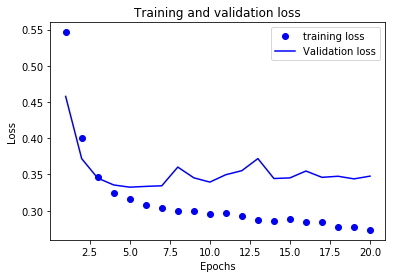

In [63]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['acc']

epochs = range(1, len(acc) +1)

plt.plot(epochs,loss_values,'bo',label='training loss')
plt.plot(epochs,val_loss_values,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend()

plt.show

Plotting the training and validation accuracy

<function matplotlib.pyplot.show(*args, **kw)>

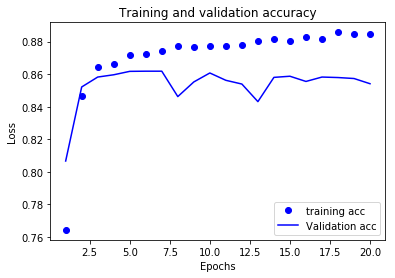

In [64]:
plt.clf()
acc_values=history_dict['acc']
val_acc_values=history_dict['val_acc']
plt.plot(epochs,acc_values,'bo',label='training acc')
plt.plot(epochs,val_acc_values,'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend()

plt.show

Retraining a model from scratch

In [65]:
model = models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

model.fit(x_train,y_train,epochs=4,batch_size=512)
results = model.evaluate(x_test,y_test)

Epoch 1/4
25000/25000 [==============================] - 2s 82us/step - loss: 0.5283 - acc: 0.7827
Epoch 2/4
25000/25000 [==============================] - 2s 61us/step - loss: 0.3712 - acc: 0.8563
Epoch 3/4
25000/25000 [==============================] - 2s 71us/step - loss: 0.3296 - acc: 0.8650
Epoch 4/4
25000/25000 [==============================] - 3s 114us/step


In [66]:
print(results)

[0.32978238047599795, 0.86156]


Using a trained network to generate predictions on new data

In [67]:
model.predict(x_test)

array([[0.31776315],
       [0.99761426],
       [0.31618428],
       ...,
       [0.09138818],
       [0.09566091],
       [0.3417119 ]], dtype=float32)